In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('pinterest_labels.csv')

In [2]:
df_copy = df
df.head()

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/


In [3]:
LOOKUP = set(['male','female','monster','environment'])
new_column = []
for i, row in enumerate(df['labels']):
    new_array = []
    items = row[1:len(row)-1]
    items = items.split(",")
    for item in items:
        new_item = item[1:len(item)-1]
        if new_item in LOOKUP:
            new_array.append(new_item)
    new_column.append(new_array)

In [4]:
print(new_column)

[['male', 'monster'], ['male', 'monster'], ['female', 'environment'], ['monster'], ['monster'], ['monster'], ['monster'], ['male', 'monster'], ['monster', 'male'], ['monster', 'male'], ['female'], ['monster'], ['male', 'environment'], ['female', 'environment'], ['female', 'environment'], ['monster', 'male'], ['female'], ['monster'], ['male', 'environment'], ['monster'], ['monster'], ['monster'], ['male', 'monster'], ['female', 'monster'], ['male', 'monster'], ['male', 'monster'], ['monster', 'male'], ['monster'], ['monster'], ['environment'], ['male'], ['monster'], ['monster'], ['monster'], ['monster', 'male'], ['environment'], [], ['monster'], ['male'], ['environment'], ['monster', 'female', 'environment'], ['female', 'monster'], ['female', 'environment'], ['female', 'environment'], ['monster'], ['female'], ['male', 'monster'], ['female', 'monster'], [], [], ['monster'], ['male', 'environment'], ['female', 'monster'], ['female'], ['environment'], ['female'], ['environment'], ['monster

In [5]:
df['labels_std'] = new_column

In [6]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [7]:
LabelsCount = {'female':0, 'male':0, 'monster':0, 'environment':0}
for row in new_column:
    for item in row:
        LabelsCount[item] += 1
print(LabelsCount)

{'female': 9448, 'male': 8221, 'monster': 10025, 'environment': 7887}


In [8]:
df = df[df['labels_std'].map(len) > 0]

In [9]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [10]:
LabelsCount = {'female':0, 'male':0, 'monster':0, 'environment':0}
for row in new_column:
    for item in row:
        LabelsCount[item] += 1
print(LabelsCount)

{'female': 9448, 'male': 8221, 'monster': 10025, 'environment': 7887}


In [11]:
df

,labels,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels_std
0,"[""mummy"",""knife"",""hood"",""egyptian"",""nails"",""sq...",2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,"[""rat"",""lantern"",""sword"",""robes"",""hood"",""tatte...",3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,"[""girl"",""bike"",""station"",""outside"",""helmet"",""f...",4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,"[""ramsesmelendeze"",""wings"",""bats"",""bat"",""hood""...",5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,"[""water"",""elemental"",""myrmidon"",""claws"",""chain...",6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,"[""skull"",""skeleton"",""wings"",""hooves"",""scorpion...",7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,"[""skulls"",""skull"",""skeleton"",""sword"",""swords"",...",9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,"[""mace"",""skeleton"",""armor"",""shield"",""skull"",""u...",10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,"[""cavaleiro"",""congelado"",""skeleton"",""skull"",""i...",11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,"[""role"",""playing"",""game"",""monster"",""skeleton"",...",12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [12]:
df = df.drop(['labels'], axis=1)

In [13]:
df = df.rename(columns={"labels_std": "labels"})

In [14]:
df

,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels
0,2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [15]:
df['hexCode'].nunique()

14164

In [16]:
df

,pinIndex,title,hexCode,imgWidth,imgHeight,imgUrl,pinterestUrl,labels
0,2,,#ffffff,852,1000,https://i.pinimg.com/originals/21/18/03/211803...,https://www.pinterest.com/pin/765119424176534367/,"[male, monster]"
1,3,,#313132,1271,1600,https://i.pinimg.com/originals/ff/24/63/ff2463...,https://www.pinterest.com/pin/765119424176534365/,"[male, monster]"
2,4,,#2a2118,570,570,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,https://www.pinterest.com/pin/765119424176533634/,"[female, environment]"
3,5,Evil Lords Await by ramsesmelendeze,#a6aeb9,696,900,https://i.pinimg.com/originals/07/41/1b/07411b...,https://www.pinterest.com/pin/765119424176533630/,[monster]
4,6,Water Elemental Myrmidon,#494949,1170,1600,https://i.pinimg.com/originals/00/e8/07/00e807...,https://www.pinterest.com/pin/765119424176533624/,[monster]
5,7,,#ffffff,564,775,https://i.pinimg.com/originals/81/39/b6/8139b6...,https://www.pinterest.com/pin/765119424176533619/,[monster]
6,9,,#567886,1496,1600,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,https://www.pinterest.com/pin/765119424176533608/,[monster]
7,10,,#ffffff,341,600,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,https://www.pinterest.com/pin/765119424176533604/,"[male, monster]"
8,11,Cavaleiro congelado,#56747f,815,981,https://i.pinimg.com/originals/cd/13/75/cd1375...,https://www.pinterest.com/pin/765119424176533601/,"[monster, male]"
9,12,Rede Social – Pinterest - Role Playing Game - ...,#ffffff,563,742,https://i.pinimg.com/originals/a9/91/50/a99150...,https://www.pinterest.com/pin/765119424176533597/,"[monster, male]"


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import heapq

In [19]:
widthDict = {}
for width in df['imgWidth']:
    if width not in widthDict:
        widthDict[width] = 1
    else:
        widthDict[width] += 1
    
heightDict = {}
for height in df['imgHeight']:
    if height not in heightDict:
        heightDict[height] = 1
    else:
        heightDict[height] += 1

widthDictKeys, widthDictValues = widthDict.keys(), widthDict.values()
heightDictKeys, heightDictValues = heightDict.keys(), heightDict.values()

In [20]:
top_five_imgWidths = heapq.nlargest(5,widthDictValues)
top_five_imgHeights = heapq.nlargest(5,heightDictValues)

print(top_five_imgWidths,top_five_imgHeights)

[1026, 608, 528, 513, 477] [639, 571, 533, 521, 498]


In [21]:
histogramOfTopFiveWidths = []
for value in top_five_imgWidths:
    for key in widthDictKeys:
        if widthDict[key] == value:
            histogramOfTopFiveWidths.append((key, value))
print(histogramOfTopFiveWidths)

[(500, 1026), (600, 608), (1000, 528), (1920, 513), (640, 477)]


In [22]:
histogramOfTopFiveHeights = []
for value in top_five_imgHeights:
    for key in heightDictKeys:
        if heightDict[key] == value:
            histogramOfTopFiveHeights.append((key, value))
print(histogramOfTopFiveHeights)

[(1000, 639), (960, 571), (1600, 533), (800, 521), (1200, 498)]


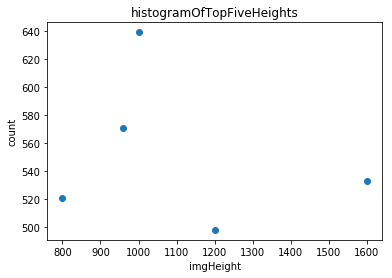

In [23]:
plt.scatter(*zip(*histogramOfTopFiveHeights))
plt.title('histogramOfTopFiveHeights')
plt.xlabel('imgHeight')
plt.ylabel('count')
plt.show()

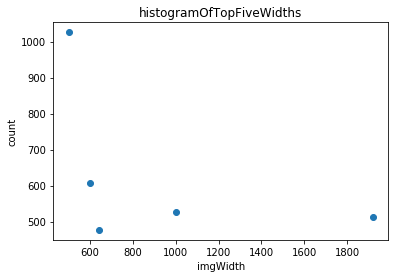

In [24]:
plt.scatter(*zip(*histogramOfTopFiveWidths))
plt.title('histogramOfTopFiveWidths')
plt.xlabel('imgWidth')
plt.ylabel('count')
plt.show()

In [25]:
avgHeight = 0
for height in df['imgHeight']:
    avgHeight += height
avgHeight = avgHeight/len(df['imgHeight'])
print(avgHeight, len(df['imgHeight']))

1043.5123244929798 19230


In [26]:
avgWidth = 0
for width in df['imgWidth']:
    avgWidth += width
avgWidth = avgWidth/len(df['imgWidth'])
print(avgWidth, len(df['imgWidth']))

789.658190327613 19230


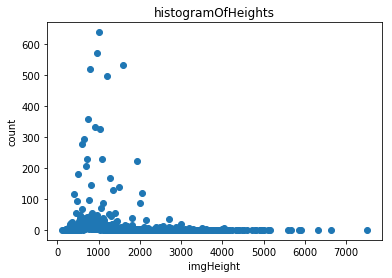

In [27]:
plt.scatter(*zip(*list(heightDict.items())))
plt.title('histogramOfHeights')
plt.xlabel('imgHeight')
plt.ylabel('count')
plt.show()

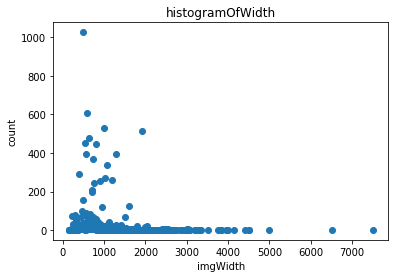

In [28]:
plt.scatter(*zip(*list(widthDict.items())))
plt.title('histogramOfWidth')
plt.xlabel('imgWidth')
plt.ylabel('count')
plt.show()

In [29]:
colorHisto = {}
for color in df['hexCode']:
    if color not in colorHisto:
        colorHisto[color] = 1
    else:
        colorHisto[color] += 1

colorHistoKeys, colorHistoValues = colorHisto.keys(), colorHisto.values()
print(colorHisto)

{'#ffffff': 2265, '#313132': 2, '#2a2118': 2, '#a6aeb9': 2, '#494949': 5, '#567886': 2, '#56747f': 4, '#23212b': 2, '#d6d6d7': 2, '#60454c': 2, '#0c3034': 2, '#d8d8d8': 6, '#676c6f': 3, '#301b1b': 3, '#fef8d4': 23, '#fffefc': 4, '#29285e': 2, '#253117': 2, '#3e403d': 2, '#839f7f': 2, '#5d211b': 2, '#675a51': 3, '#fdfbfc': 2, '#7c7c7c': 7, '#753d23': 2, '#fefdfe': 3, '#a99d8d': 2, '#103232': 2, '#1d1e25': 2, '#c7bbc2': 2, '#282828': 6, '#414141': 6, '#292929': 8, '#ababab': 3, '#efeeea': 7, '#a79da1': 2, '#0b1229': 2, '#27292d': 2, '#6f4a42': 2, '#232323': 3, '#4d3f1f': 2, '#5b583a': 2, '#3e2520': 1, '#403328': 2, '#2c2a28': 2, '#768568': 2, '#b19581': 2, '#6c6650': 2, '#fefefe': 197, '#aba5a0': 2, '#26252b': 2, '#666874': 2, '#384a39': 2, '#515262': 2, '#594b5b': 2, '#c9c28e': 2, '#465159': 2, '#0f4443': 2, '#f8f6e2': 2, '#31613b': 2, '#635e51': 2, '#503c33': 2, '#eca930': 2, '#f3eb7b': 2, '#2f2b1f': 2, '#3c3c24': 2, '#313034': 2, '#6f5b4a': 2, '#202334': 2, '#76654d': 2, '#a09e98': 2,

In [30]:
# plt.scatter(*zip(*list(colorHisto.items())))
# plt.title('histogramOfHexCodes')
# plt.xlabel('hexCode')
# plt.ylabel('count')
# plt.show()

In [31]:
import nltk

In [32]:
# https://github.com/Sukhrobjon/DS-2.1-ML-Challenges/blob/master/final_project/classifying_movie_genres.ipynb

# create dataframe
all_labels_df = pd.DataFrame({'Label': list(LabelsCount.keys()), 
                              'Count': list(LabelsCount.values())})


all_labels_df

,Label,Count
0,female,9448
1,male,8221
2,monster,10025
3,environment,7887


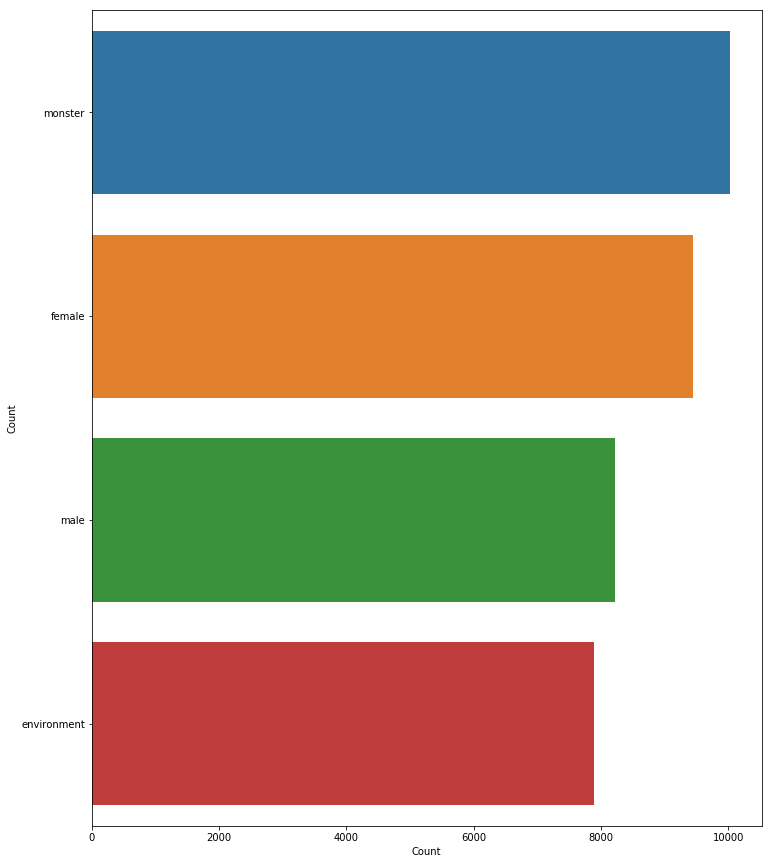

In [33]:
g = all_labels_df.nlargest(columns="Count", n = 4) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Label") 
ax.set(ylabel = 'Count') 
plt.show()

In [34]:
# copying the Description and Genre of a movie

dataset = pd.DataFrame(df[["imgUrl","labels"]])
dataset['key'] = dataset.index
dataset = dataset[['key', 'imgUrl', 'labels']]


from sklearn.preprocessing import MultiLabelBinarizer

data_mlb = MultiLabelBinarizer()

data_mlb.fit(dataset['labels'])


# transform target variable
target = data_mlb.transform(dataset['labels'])

list(data_mlb.classes_)

['environment', 'female', 'male', 'monster']

In [35]:
target

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 0, 0],
       ...,
       [0, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 0]])

In [36]:
dataset

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]"
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]"
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster]
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster]
5,5,https://i.pinimg.com/originals/81/39/b6/8139b6...,[monster]
6,6,https://i.pinimg.com/originals/d0/fd/12/d0fd12...,[monster]
7,7,https://i.pinimg.com/originals/2b/4c/e7/2b4ce7...,"[male, monster]"
8,8,https://i.pinimg.com/originals/cd/13/75/cd1375...,"[monster, male]"
9,9,https://i.pinimg.com/originals/a9/91/50/a99150...,"[monster, male]"


In [37]:
# dataset.to_csv(r'/Users/jamesmccrory/Desktop/urls_labels.csv', index = None, header=True)

In [38]:
# commenting the below cell out and creating a new .csv from the results:
# import cv2

# pixel_data = []

# for i,j in dataset.iterrows(): 
#     im = cv2.imread("/Users/jamesmccrory/Documents/dev/pinterest_dataset/images/" + str(i) + ".jpg")
#     pixel_data.append(im)

# dataset['pixel_data'] = pixel_data  

In [39]:
dataset.head()

,key,imgUrl,labels
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"[male, monster]"
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"[male, monster]"
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"[female, environment]"
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,[monster]
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,[monster]


In [40]:
# dataset.to_csv(r'/Users/jamesmccrory/Desktop/urls_labels_pixeldata.csv', index = None, header=True)

In [41]:
pixeldata_DF = pd.read_csv('urls_labels_pixeldata.csv')

In [42]:
pixeldata_DF.head()

,key,imgUrl,labels,pixel_data
0,0,https://i.pinimg.com/originals/21/18/03/211803...,"['male', 'monster']",[[[255 255 255]\n [255 255 255]\n [255 255 2...
1,1,https://i.pinimg.com/originals/ff/24/63/ff2463...,"['male', 'monster']",[[[28 26 25]\n [28 26 25]\n [28 26 25]\n .....
2,2,https://i.pinimg.com/originals/d5/ce/97/d5ce97...,"['female', 'environment']",[[[ 20 15 14]\n [ 23 18 17]\n [ 29 25 ...
3,3,https://i.pinimg.com/originals/07/41/1b/07411b...,['monster'],[[[200 192 192]\n [200 192 192]\n [200 192 1...
4,4,https://i.pinimg.com/originals/00/e8/07/00e807...,['monster'],[[[94 94 94]\n [80 80 80]\n [79 79 79]\n .....


In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
# copy-pasted from Sukhrob's github linked above.
def create_wordcloud(dataset):
#     text = " ".join(item for item in dataset.astype(str))
    text = " ".join(desc for desc in dataset)
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'Black').generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

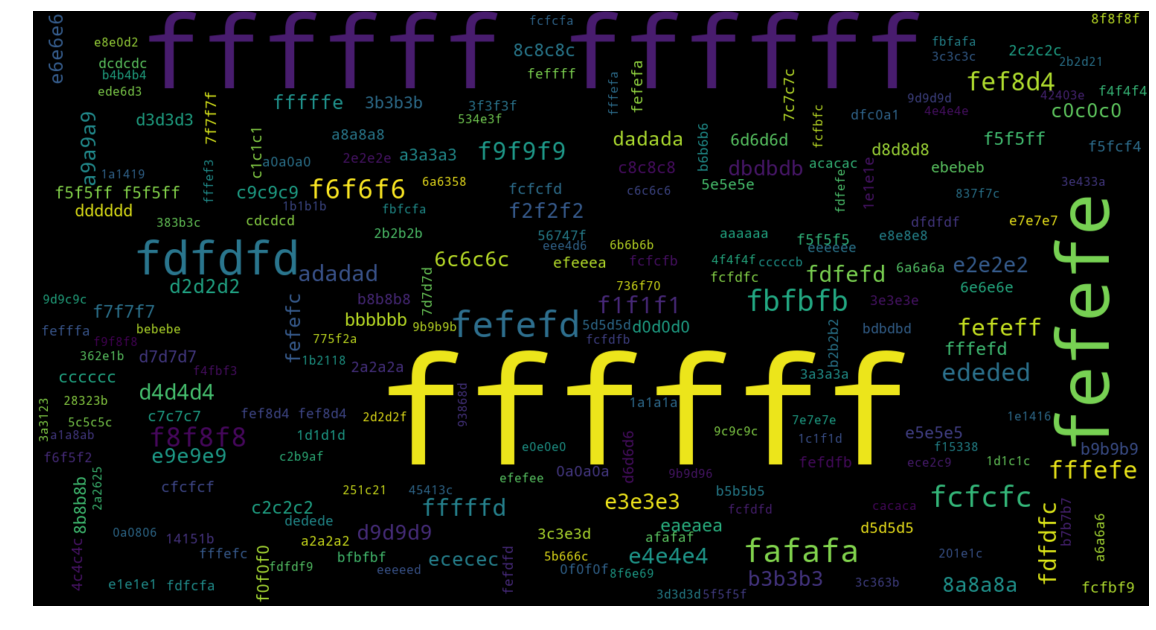

In [45]:
create_wordcloud(df["hexCode"])